# House_Loan_Data_Analysis By Mohammad Sameer Uddin

In [1]:
# The Following Tasks has to be perform under this project
# ⦁    Load the dataset that is given to you
# ⦁    Check for null values in the dataset
# ⦁    Print percentage of default to payer of the dataset for the TARGET column
# ⦁    Balance the dataset if the data is imbalanced
# ⦁    Plot the balanced data or imbalanced data
# ⦁    Encode the columns that is required for the model
# ⦁    Calculate Sensitivity as a metrice
# ⦁    Calculate area under receiver operating characteristics curve

# ⦁    Load the dataset that is given to you

In [3]:
link = 'https://drive.google.com/file/d/1k4PYhGEEtP4M0B0j8Y3XcmxXEC7j1KJs/view'
link = link.split("/")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_loan = pd.read_csv('loan_data.csv')
print(df_loan.shape)
df_loan.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# ⦁    Check for null values in the dataset

In [4]:

df_int    = df_loan.select_dtypes('int64')
df_float  = df_loan.select_dtypes('float64')
df_object = df_loan.select_dtypes('object')
print(df_int.shape)
print(df_float.shape)
print(df_object.shape)
df_int.isna().sum()
print(df_float.isna().sum())
print(df_object.isna().sum())
print(df_float.columns)
print(df_object.columns)

(307511, 41)
(307511, 65)
(307511, 16)
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 65, dtype: int64
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE    

In [4]:
# If we see the columns 'NAME_INCOME_TYPE' & 'OCCUPATION_TYPE' are dependent on one another, 
# so correspondingly we can define the occupation type with most frequently occurred income type
# and fill the null values, for that we need to create a dictionary to mapping types.
df_object['NAME_INCOME_TYPE'].value_counts()

index_no = df_object['NAME_INCOME_TYPE'].value_counts().sort_index().index
index_no[0]

dict = {'Working':'Laborers','Commercial associate':'Laborers',
        'Pensioner':'Cleaning staff','State servant':'Core staff','Unemployed':'Unemployed',
        'Student':'Laborers','Businessman':'Managers','Maternity leave':'Core staff'}

df_object[df_object['NAME_INCOME_TYPE']=='Working']['OCCUPATION_TYPE'].value_counts()
for i in range(len(dict)):
    for x in range(len(df_loan['OCCUPATION_TYPE'])):
        if df_loan['NAME_INCOME_TYPE'][x]==index_no[i]:
            if pd.isna(df_loan['OCCUPATION_TYPE'][x]):
                 df_loan['OCCUPATION_TYPE'][x]=dict[index_no[i]]

print('Missing values in Occupation type: {}'.format(df_loan['OCCUPATION_TYPE'].isna().sum()))

Missing values in Occupation type: 0


In [8]:
df_object['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [6]:
df_object['NAME_INCOME_TYPE'].value_counts()
df_object['OCCUPATION_TYPE'].value_counts()


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [5]:
# The most frequently occurred in NAME_TYPE_SUITE is Unaccompanied do lers fill the missing values in this column
print(df_object['NAME_FAMILY_STATUS'].value_counts())
print(df_object['NAME_TYPE_SUITE'].value_counts())
df_loan['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)
df_loan['NAME_TYPE_SUITE']
print('Missing values in NAME_TYPE_SUITE: {}'.format(df_loan['NAME_TYPE_SUITE'].isna().sum()))

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Missing values in NAME_TYPE_SUITE: 0


In [6]:
# The missing values in these columns 'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'
# are more than 50% it is better to drop them
colmn = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
df_loan.drop(colmn, inplace = True, axis=1)
df_loan.select_dtypes('object').isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [7]:
i1 = df_float.columns
missing_value_columns=[]
for i in range(len(i1)):
    if df_float[i1[i]].isna().any():
        missing_value_columns.append(i1[i])
missing_value_columns.sort()
missing_value_columns
df_loan.select_dtypes('float64').isna().any()

AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
REGION_POPULATION_RELATIVE    False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 65, dtype: bool

In [8]:
df_loan.select_dtypes('float64').isna().any()

AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
REGION_POPULATION_RELATIVE    False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 65, dtype: bool

In [9]:
columns = df_loan.columns
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=0)
df_loan = imputer.fit_transform(df_loan)
df_loan = pd.DataFrame(columns=columns, data = df_loan)
df_loan.select_dtypes('float64').isna().any()

Series([], dtype: bool)

# ⦁    Print percentage of default to payer of the dataset for the TARGET column

In [10]:
print("Percentage of default to pay is {} %".format((df_loan['TARGET'].value_counts()[1]/len(df_loan['TARGET']))*100))

Percentage of default to pay is 8.072881945686495 %


# ⦁    Plot the balanced data or imbalanced data

0    282686
1     24825
Name: TARGET, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


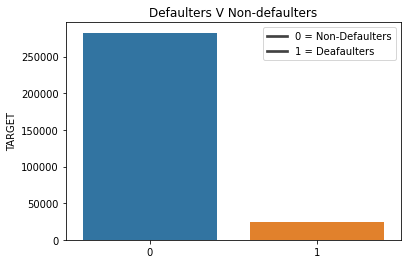

In [11]:
#⦁    BarPlot of imbalanced dataset
print(df_loan['TARGET'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.barplot(df_loan['TARGET'].value_counts().index, df_loan['TARGET'].value_counts()))
plt.title('Defaulters V Non-defaulters')
plt.legend(labels = ['0 = Non-Defaulters','1 = Deafaulters'])
plt.show()
# The dataset is highly imbalanced

# ⦁    Encode the columns that is required for the model

In [12]:
df_loan.shape
X = df_loan.drop(['TARGET'],axis= 1)
Y = df_loan['TARGET']
colmn = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
df_object.drop(colmn, inplace = True, axis=1)
col = df_object.columns
len(col)
import sklearn
x_dummified = pd.get_dummies(data = df_loan, columns=col, drop_first = True)
x_dummified.shape

(307511, 219)

# ⦁    Balance the dataset if the data is imbalanced

0.8.0
(565372, 219)
(565372,)
AxesSubplot(0.125,0.125;0.775x0.755)


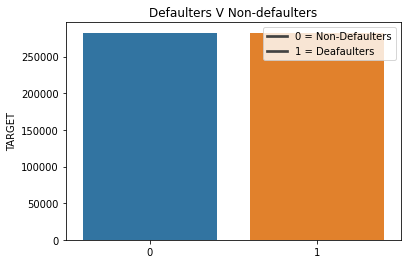

In [13]:
# The datset can be balanced by SMOTE:Synthetic Mean Oversampling Technique
# check version number
import imblearn
print(imblearn.__version__)
# transform the dataset
Y=Y.astype('int')
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(x_dummified, Y)
print(X.shape)
print(Y.shape)
#⦁    Plot the balanced data
print(sns.barplot(Y.value_counts().index, Y.value_counts()))
plt.title('Defaulters V Non-defaulters')
plt.legend(labels = ['0 = Non-Defaulters','1 = Deafaulters'])
plt.show()
# The dataset is balanced

# ⦁    Calculate Sensitivity as a metric
lets build a deep neural network using tensorflow and keras as backend

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state = 1)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(128, input_shape=(219,), activation="relu",kernel_initializer='random_normal'))
model.add(Dense(64, activation="relu",kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dense(12,  activation="relu",kernel_initializer='random_normal'))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid",kernel_initializer='random_normal'))  
opt = SGD(lr=0.01, momentum=0.9)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=["Recall","accuracy"])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               28160     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_26 (Dense)             (None, 12)                780       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 13        
Total params: 37,465
Trainable params: 37,337
Non-trainable params: 128
________________________________________________

In [40]:
xtrain = np.asarray(xtrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)
history1 = model.fit(xtrain,ytrain,epochs=10, batch_size=32,callbacks=[monitor],
                     validation_data=(xtest, ytest),verbose=2)

Epoch 1/10
14135/14135 - 33s - loss: 0.6823 - recall: 0.6228 - accuracy: 0.5622 - val_loss: 0.6868 - val_recall: 0.7495 - val_accuracy: 0.5514
Epoch 2/10
14135/14135 - 26s - loss: 0.6874 - recall: 0.6787 - accuracy: 0.5479 - val_loss: 0.6867 - val_recall: 0.6149 - val_accuracy: 0.5503
Epoch 3/10
14135/14135 - 28s - loss: 0.6873 - recall: 0.6725 - accuracy: 0.5492 - val_loss: 0.6870 - val_recall: 0.6844 - val_accuracy: 0.5519
Epoch 4/10
14135/14135 - 27s - loss: 0.6872 - recall: 0.6710 - accuracy: 0.5495 - val_loss: 0.6858 - val_recall: 0.7011 - val_accuracy: 0.5555
Epoch 5/10
14135/14135 - 29s - loss: 0.6867 - recall: 0.6607 - accuracy: 0.5517 - val_loss: 0.6905 - val_recall: 0.7259 - val_accuracy: 0.5512
Epoch 6/10
Restoring model weights from the end of the best epoch.
14135/14135 - 27s - loss: 0.6874 - recall: 0.6910 - accuracy: 0.5484 - val_loss: 0.6880 - val_recall: 0.6754 - val_accuracy: 0.5519
Epoch 00006: early stopping


# ⦁    Calculate area under receiver operating characteristics curve

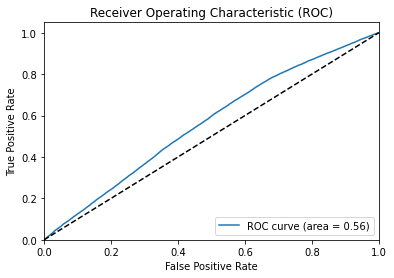

In [60]:
# Plot an ROC. 
# lets define a function for roc curve
# ypred - the predictions, ytest - the actual output.
from sklearn.metrics import roc_curve, auc
def plot_roc(ypred,ytest):
    fpr, tpr, _ = roc_curve(ytest, ypred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

ypred = model.predict(xtest)
plot_roc(ypred,ytest)
# The area under teh curve is 0.56 square units

# **************Thank you*****************